In [ ]:
pip install pandas openpyxl


IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df_one = pd.read_excel("/content/C2024[67].xlsx")
df_two = pd.read_excel("/content/C2025[4].xlsx")
df_three = pd.read_excel("/content/C2026[5].xlsx")

In [ ]:
# get the necessary columns
columns = ["#","Major", "Major Sum", "Gender", "Citizen", "Grades: Type of Exam","FA Request","Interview (30)","Extra Curricular    (10)",
            "Essay    (10) ", "Transcript (10)", "Exam (30)", "Core Math  (10)", "Physics   (10) ", "Elective / Further Math (10)", "Admit status"]


df_one_selected = df_one[columns]
df_one_selected

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
0,1.0,[B.Sc.] Mechanical Engineering,Engineering,F,ZW Zimbabwe,High School Diploma,Yes,29.0,9.0,8.5,10.0,30.0,10.0,10.0,10.0,Admit
1,2.0,[B.Sc.] Computer Engineering,Engineering,M,CM Cameroon,IGCSE 'A' Level,Yes,28.5,10.0,8.0,8.5,30.0,10.0,10.0,10.0,Admit
2,3.0,[B.Sc.] Mechanical Engineering,Engineering,F,RW Rwanda,High School Diploma,Yes,26.0,9.0,7.5,10.0,30.0,10.0,10.0,10.0,Admit
3,4.0,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,28.5,6.0,7.5,10.0,30.0,10.0,10.0,10.0,Deny
4,6.0,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,IGCSE 'A' Level,No,27.0,8.0,8.5,7.5,30.0,10.0,10.0,10.0,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,1238.0,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,Deny
1032,1239.2,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,Deny
1033,1240.4,[B.Sc.] Mechanical Engineering,Engineering,F,CD Congo - Kinshasa,High School Diploma,Yes,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,Deny
1034,1241.6,[B.Sc.] Business Administration,Arts and Science,M,CD Congo - Kinshasa,High School Diploma,Yes,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,Deny


# CLASS OF 2024

In [ ]:
# Explore the Class of 2024 Dataset
df_one_selected.info()

df_one_selected.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #                             1036 non-null   float64
 1   Major                         1036 non-null   object 
 2   Major Sum                     1036 non-null   object 
 3   Gender                        1036 non-null   object 
 4   Citizen                       1036 non-null   object 
 5   Grades: Type of Exam          1036 non-null   object 
 6   FA Request                    1036 non-null   object 
 7   Interview (30)                1020 non-null   float64
 8   Extra Curricular    (10)      1020 non-null   float64
 9   Essay    (10)                 1033 non-null   float64
 10  Transcript (10)               997 non-null    float64
 11  Exam (30)                     914 non-null    float64
 12  Core Math  (10)               917 non-null    float64
 13  Phy

,#,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10)
count,1036.000000,1020.000000,1020.000000,1033.000000,997.00000,914.000000,917.000000,922.000000,920.000000
mean,621.800000,21.733824,5.725980,6.293224,7.07653,23.184902,8.208288,2.454447,2.754348
std,359.054091,3.514600,1.607197,0.876255,1.67741,6.932767,2.390670,3.755356,4.216719
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,311.300000,20.000000,5.000000,6.000000,6.50000,20.000000,6.000000,0.000000,0.000000
50%,621.800000,22.000000,6.000000,6.000000,7.50000,25.000000,10.000000,0.000000,0.000000
75%,932.300000,24.000000,7.000000,7.000000,8.50000,30.000000,10.000000,6.000000,6.500000
max,1242.800000,30.000000,10.000000,8.500000,10.00000,30.000000,20.000000,10.000000,20.000000


In [ ]:
df_one_selected['Admit status'].value_counts()

Admit status
Deny            493
Admit           468
No Aid           52
Waitlist         10
Withdrawn         7
waitlist          5
Disqualified      1
Name: count, dtype: int64

In [ ]:
df_one_selected['Citizen'].value_counts()

Citizen
GH Ghana               807
ZW Zimbabwe             39
RW Rwanda               37
CM Cameroon             32
NG Nigeria              26
KE Kenya                19
US United States        15
CD Congo - Kinshasa     11
UG Uganda                9
MW Malawi                7
ET Ethiopia              5
BI Burundi               4
GM The Gambia            4
LR Liberia               3
ZM Zambia                3
SS South Sudan           2
CI Côte d’Ivoire         2
NO Norway                1
SO Somalia               1
BJ Benin                 1
BF Burkina Faso          1
LY Libya                 1
SZ Swaziland             1
TG Togo                  1
MZ Mozambique            1
LS Lesotho               1
TZ Tanzania              1
GB United Kingdom        1
Name: count, dtype: int64

In [ ]:
df_one_selected['FA Request'].value_counts()

FA Request
Yes    608
No     428
Name: count, dtype: int64

In [ ]:
df_one_selected['Gender'].value_counts()

Gender
M    637
F    399
Name: count, dtype: int64

In [ ]:
df_one_selected['Grades: Type of Exam'].value_counts()

Grades: Type of Exam
WASSCE - Ghana                                                  642
IGCSE 'A' Level                                                 139
High School Diploma                                              74
Other Official Exam                                              74
International Baccalaureate (IB) Diploma                         46
WASSCE - Nigeria                                                 21
WASSCE - Ghana|Other Official Exam                                9
High School Diploma|Other Official Exam                           8
IGCSE 'A' Level|High School Diploma                               3
WASSCE - Gambia                                                   3
WASSCE - Ghana|High School Diploma                                2
IGCSE 'A' Level|International Baccalaureate (IB) Diploma          2
Other Official Exam|High School Diploma                           1
IGCSE 'A' Level|WASSCE - Nigeria                                  1
wassce gh                  

In [ ]:
df_one_selected['Major'].value_counts()

Major
[B.Sc.] Business Administration                  377
[B.Sc.] Computer Science                         231
[B.Sc.] Electrical and Electronic Engineering    121
[B.Sc.] Mechanical Engineering                   119
[B.Sc.] Computer Engineering                     113
[B.Sc.] Management Information Systems            75
Name: count, dtype: int64

In [ ]:
df_one_selected['#'] = df_one_selected['#'].astype(np.int64)

<ipython-input-15-a99a6a86c205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_selected['#'] = df_one_selected['#'].astype(np.int64)


DATA CLEANING

In [ ]:
# based on the dataset there are students who applied for Arts and Science and did not have to fill the Physics and Elective/Math hence we are replacing the NAs with 0
df_filtered = df_one_selected[df_one_selected['Major Sum'] == "Arts and Science"]

rows_with_na = df_filtered[df_filtered[['Elective / Further Math (10)', 'Physics   (10) ']].isna().all(axis=1)]

In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
702,843,[B.Sc.] Computer Science,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,14.5,5.0,6.0,10.0,20.0,10.0,0.0,0.0,Admit
843,1012,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,WASSCE - Ghana,No,19.5,6.0,6.0,7.5,10.0,6.0,0.0,0.0,Deny
850,1020,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,IGCSE 'A' Level,Yes,17.5,4.5,6.0,6.5,10.0,10.0,0.0,0.0,Deny
871,1046,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,WASSCE - Ghana,No,17.0,4.0,6.0,6.5,10.0,8.0,0.0,0.0,Deny
877,1053,[B.Sc.] Business Administration,Arts and Science,M,GH Ghana,WASSCE - Ghana,Yes,21.5,3.5,6.5,8.5,5.0,6.0,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1230,[B.Sc.] Business Administration,Arts and Science,M,BI Burundi,High School Diploma,Yes,NaN,NaN,6.0,NaN,NaN,NaN,0.0,0.0,Deny
1026,1232,[B.Sc.] Business Administration,Arts and Science,M,CD Congo - Kinshasa,Other Official Exam,No,NaN,NaN,6.0,NaN,NaN,NaN,0.0,0.0,Deny
1027,1233,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,0.0,0.0,6.0,NaN,NaN,NaN,0.0,0.0,Deny
1031,1238,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,6.0,NaN,NaN,NaN,0.0,0.0,Deny


In [ ]:
df_one_selected.set_index('#', inplace=True)

students_with_na_filled.set_index('#', inplace = True)


df_one_selected.update(students_with_na_filled)


In [ ]:
df_one_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 1 to 1242
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major                         1036 non-null   object 
 1   Major Sum                     1036 non-null   object 
 2   Gender                        1036 non-null   object 
 3   Citizen                       1036 non-null   object 
 4   Grades: Type of Exam          1036 non-null   object 
 5   FA Request                    1036 non-null   object 
 6   Interview (30)                1020 non-null   float64
 7   Extra Curricular    (10)      1020 non-null   float64
 8   Essay    (10)                 1033 non-null   float64
 9   Transcript (10)               997 non-null    float64
 10  Exam (30)                     914 non-null    float64
 11  Core Math  (10)               917 non-null    float64
 12  Physics   (10)                999 non-null    float64
 13  Elective

In [ ]:
rows_with_na = df_one_selected[df_one_selected[['Essay    (10) ','Interview (30)','Extra Curricular    (10)','Exam (30)','Core Math  (10)','Transcript (10)']].isna().any(axis=1)]

In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Essay    (10) ': 0,
    'Interview (30)': 0,
    'Extra Curricular    (10)':0,
    'Exam (30)':0,
    'Core Math  (10)':0,
    'Transcript (10)':0
})

In [ ]:
df_one_selected.reset_index(inplace=True)
df_one_selected.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_one_selected.update(students_with_na_filled)

In [ ]:
df_filtered = df_one_selected[df_one_selected['Major Sum'] == "Engineering"]

rows_na = df_filtered[df_filtered[['Elective / Further Math (10)', 'Physics   (10) ']].isna().all(axis=1)]

# Replace NAs in the filtered dataset
students_with_na_filled = rows_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
567,[B.Sc.] Mechanical Engineering,Engineering,M,TG Togo,Other Official Exam,Yes,22.0,6.0,6.5,7.5,25.0,10.0,0.0,0.0,Deny
1022,[B.Sc.] Computer Engineering,Engineering,M,CD Congo - Kinshasa,High School Diploma,Yes,21.5,6.0,5.5,6.5,15.0,0.0,0.0,0.0,Deny
1085,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,SO Somalia,Other Official Exam,Yes,25.0,7.0,6.0,7.5,0.0,0.0,0.0,0.0,Deny
1086,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,24.0,6.0,7.5,7.5,0.0,0.0,0.0,0.0,Deny
1089,[B.Sc.] Computer Engineering,Engineering,F,CM Cameroon,IGCSE 'A' Level,Yes,23.5,9.0,6.0,6.5,0.0,0.0,0.0,0.0,Deny
1102,[B.Sc.] Mechanical Engineering,Engineering,M,ET Ethiopia,Other Official Exam|High School Diploma,Yes,21.0,8.0,6.0,8.5,0.0,0.0,0.0,0.0,Deny
1108,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,No,22.0,7.0,6.0,7.5,0.0,0.0,0.0,0.0,Deny
1115,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,International Baccalaureate (IB) Diploma,No,23.0,6.0,6.0,7.0,0.0,0.0,0.0,0.0,Deny
1118,[B.Sc.] Computer Engineering,Engineering,M,ET Ethiopia,High School Diploma|Other Official Exam,Yes,20.0,6.0,6.0,10.0,0.0,0.0,0.0,0.0,Deny


In [ ]:
df_one_selected.reset_index(inplace=True)
df_one_selected.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_one_selected.update(students_with_na_filled)



In [ ]:
rows_with_na = df_one_selected[df_one_selected[['Elective / Further Math (10)']].isna().any(axis=1)]

# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Elective / Further Math (10)': 0,
})

students_with_na_filled

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
435,[B.Sc.] Mechanical Engineering,Engineering,M,MW Malawi,High School Diploma,Yes,19.5,6.0,6.0,7.5,25.0,10.0,8.0,0.0,Deny
894,[B.Sc.] Computer Engineering,Engineering,M,CD Congo - Kinshasa,High School Diploma,Yes,21.0,6.0,6.0,5.0,15.0,4.0,6.0,0.0,Deny


In [ ]:
df_one_selected.reset_index(inplace=True)
df_one_selected.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_one_selected.update(students_with_na_filled)


In [ ]:
# WRITING TO A CSV FILE
df_one_selected.to_csv("C2024 admissions.csv",index = False)

# CLASS OF 2025

In [ ]:
df_two = pd.read_excel("/content/C2025[4].xlsx")

df_two = df_two[columns]

In [ ]:
# Explore the Class of 2025 Dataset
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #                             1120 non-null   int64  
 1   Major                         1120 non-null   object 
 2   Major Sum                     1118 non-null   object 
 3   Gender                        1120 non-null   object 
 4   Citizen                       1120 non-null   object 
 5   Grades: Type of Exam          1120 non-null   object 
 6   FA Request                    1118 non-null   object 
 7   Interview (30)                1091 non-null   float64
 8   Extra Curricular    (10)      1088 non-null   object 
 9   Essay    (10)                 1097 non-null   float64
 10  Transcript (10)               1066 non-null   float64
 11  Exam (30)                     932 non-null    float64
 12  Core Math  (10)               956 non-null    float64
 13  Phy

In [ ]:
df_two['Admit status'].value_counts()

Admit status
Deny           596
Admit          457
No Aid          32
Waitlist        30
Withdrawn        4
flight risk      1
Name: count, dtype: int64

In [ ]:
df_two['Citizen'].value_counts()

Citizen
GH Ghana               917
NG Nigeria              33
RW Rwanda               31
ZW Zimbabwe             30
CM Cameroon             26
KE Kenya                20
UG Uganda                8
US United States         8
SS South Sudan           7
TZ Tanzania              5
BI Burundi               5
TG Togo                  3
BJ Benin                 3
CI Côte d’Ivoire         3
CD Congo - Kinshasa      3
MW Malawi                3
SZ Swaziland             2
GM The Gambia            2
ZM Zambia                2
SO Somalia               2
ET Ethiopia              1
ES Spain                 1
GB United Kingdom        1
LR Liberia               1
JM Jamaica               1
DE Germany               1
NE Niger                 1
Name: count, dtype: int64

In [ ]:
df_two['FA Request'].value_counts()

FA Request
Yes       638
No        473
Yes/No      4
No/Yes      1
Yes/no      1
no          1
Name: count, dtype: int64

In [ ]:
df_two['Gender'].value_counts()

Gender
M    670
F    450
Name: count, dtype: int64

In [ ]:
df_two['Grades: Type of Exam'].value_counts()

Grades: Type of Exam
WASSCE - Ghana                                                                 772
IGCSE 'A' Level                                                                131
Other Official Exam                                                             69
High School Diploma                                                             52
International Baccalaureate (IB) Diploma                                        40
WASSCE - Nigeria                                                                24
High School Diploma\nOther Official Exam                                        12
WASSCE - Ghana\nOther Official Exam                                              5
IGCSE 'A' Level\nInternational Baccalaureate (IB) Diploma                        4
IGCSE 'A' Level\nOther Official Exam                                             2
WASSCE - Liberia\nIGCSE 'A' Level                                                1
WASSCE - Gambia                                                   

In [ ]:
df_two['Major'].value_counts()

Major
[B.Sc.] Business Administration                  363
[B.Sc.] Computer Science                         318
[B.Sc.] Electrical and Electronic Engineering    126
[B.Sc.] Computer Engineering                     125
[B.Sc.] Mechanical Engineering                   104
[B.Sc.] Management Information Systems            84
Name: count, dtype: int64

In [ ]:
df_two['#'] = df_two['#'].astype(np.int64)

In [ ]:
# based on the dataset there are students who applied for Arts and Science and did not have to fill the Physics and Elective/Math hence we are rep;acing the NAs with 0
df_filtered = df_two[df_two['Major Sum'] == "Arts and Science"]

rows_with_na = df_filtered[df_filtered[['Elective / Further Math (10)', 'Physics   (10) ']].isna().all(axis=1)]

In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
13,14,[B.Sc.] Business Administration,Arts and Science,M,GH Ghana,WASSCE - Ghana,Yes,25.0,9,6.5,7.5,30.0,10.0,0.0,0.0,Admit
15,16,[B.Sc.] Computer Science,Arts and Science,M,ZW Zimbabwe,IGCSE 'A' Level,Yes,23.0,7,7.0,8.5,30.0,10.0,0.0,0.0,Admit
16,17,[B.Sc.] Computer Science,Arts and Science,F,NG Nigeria,WASSCE - Nigeria,No,24.5,7,7.0,10.0,30.0,10.0,0.0,0.0,Admit
33,34,[B.Sc.] Computer Science,Arts and Science,M,KE Kenya,High School Diploma,Yes,24.5,7,7.5,7.5,30.0,10.0,0.0,0.0,Admit
34,35,[B.Sc.] Computer Science,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,23.0,8,6.5,8.5,30.0,10.0,0.0,0.0,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1112,[B.Sc.] Computer Science,Arts and Science,F,GH Ghana,WASSCE - Ghana,No,25.0,7,7.5,5.0,25.0,10.0,0.0,0.0,Admit
1112,1113,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,21.0,5,6.0,7.5,30.0,10.0,0.0,0.0,Admit
1113,1114,[B.Sc.] Business Administration,Arts and Science,M,GH Ghana,WASSCE - Ghana,Yes,20.0,4,5.0,5.0,30.0,10.0,0.0,0.0,Admit
1114,1115,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,Yes,25.0,7,6.0,10.0,30.0,10.0,0.0,0.0,Admit


In [ ]:
df_two.set_index('#', inplace=True)

students_with_na_filled.set_index('#', inplace = True)


df_two.update(students_with_na_filled)

In [ ]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 1 to 1120
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major                         1120 non-null   object 
 1   Major Sum                     1118 non-null   object 
 2   Gender                        1120 non-null   object 
 3   Citizen                       1120 non-null   object 
 4   Grades: Type of Exam          1120 non-null   object 
 5   FA Request                    1118 non-null   object 
 6   Interview (30)                1091 non-null   float64
 7   Extra Curricular    (10)      1088 non-null   object 
 8   Essay    (10)                 1097 non-null   float64
 9   Transcript (10)               1066 non-null   float64
 10  Exam (30)                     932 non-null    float64
 11  Core Math  (10)               956 non-null    float64
 12  Physics   (10)                1054 non-null   float64
 13  Elective

In [ ]:
rows_with_na = df_two[df_two[['Essay    (10) ','Interview (30)','Extra Curricular    (10)','Exam (30)','Core Math  (10)','Transcript (10)']].isna().any(axis=1)]
rows_with_na

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
93,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,No,23.5,8,6.0,6.5,NaN,8.0,0.0,0.0,Deny
99,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,IGCSE 'A' Level,No,24.0,7,7.0,5.5,NaN,6.0,0.0,0.0,Deny
101,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,Yes,22.0,5,5.5,6.5,NaN,9.0,0.0,0.0,Deny
102,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,Yes,22.0,6,7.5,5.5,NaN,8.0,0.0,0.0,Deny
112,[B.Sc.] Computer Science,Arts and Science,F,GH Ghana,IGCSE 'A' Level,No,27.0,7,7.0,6.5,NaN,6.0,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,[B.Sc.] Mechanical Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,25.0,10.0,6.0,8.0,Deny
1109,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1110,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,SZ Swaziland,Other Official Exam,Yes,25.5,7,NaN,7.5,NaN,NaN,NaN,NaN,Deny


In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Essay    (10) ': 0,
    'Interview (30)': 0,
    'Extra Curricular    (10)':0,
    'Exam (30)':0,
    'Core Math  (10)':0,
    'Transcript (10)':0
})

students_with_na_filled

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
93,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,No,23.5,8,6.0,6.5,0.0,8.0,0.0,0.0,Deny
99,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,IGCSE 'A' Level,No,24.0,7,7.0,5.5,0.0,6.0,0.0,0.0,Deny
101,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,Yes,22.0,5,5.5,6.5,0.0,9.0,0.0,0.0,Deny
102,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,IGCSE 'A' Level,Yes,22.0,6,7.5,5.5,0.0,8.0,0.0,0.0,Deny
112,[B.Sc.] Computer Science,Arts and Science,F,GH Ghana,IGCSE 'A' Level,No,27.0,7,7.0,6.5,0.0,6.0,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,[B.Sc.] Mechanical Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,Yes,0.0,0,0.0,0.0,25.0,10.0,6.0,8.0,Deny
1109,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,WASSCE - Ghana,No,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Deny
1110,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,SZ Swaziland,Other Official Exam,Yes,25.5,7,0.0,7.5,0.0,0.0,NaN,NaN,Deny


In [ ]:
df_two.reset_index(inplace=True)
df_two.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_two.update(students_with_na_filled)

In [ ]:
df_filtered = df_two[df_two['Major Sum'] == "Engineering"]

rows_na = df_filtered[df_filtered[['Elective / Further Math (10)', 'Physics   (10) ']].isna().any(axis=1)]

# Replace NAs in the filtered dataset
students_with_na_filled = rows_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
58,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,KE Kenya,High School Diploma,Yes,24.5,7,7.0,10.0,30.0,10.0,10.0,0.0,Deny
180,[B.Sc.] Mechanical Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,15.0,4,6.0,0.0,0.0,0.0,0.0,0.0,Deny
181,[B.Sc.] Mechanical Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,Yes,0.0,0,5.0,3.5,0.0,0.0,0.0,0.0,Deny
185,[B.Sc.] Computer Engineering,Engineering,M,NG Nigeria,WASSCE - Nigeria,Yes,22.5,5,6.0,10.0,25.0,8.0,8.0,0.0,No Aid
211,[B.Sc.] Computer Engineering,Engineering,M,ET Ethiopia,High School Diploma\nOther Official Exam,Yes,21.0,6,5.5,8.5,30.0,8.0,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,[B.Sc.] Computer Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,No,19.5,6,8.0,5.0,15.0,6.0,0.0,0.0,Deny
1084,[B.Sc.] Computer Engineering,Engineering,F,RW Rwanda,High School Diploma,Yes,25.0,7,7.0,10.0,0.0,0.0,0.0,0.0,Deny
1095,[B.Sc.] Computer Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,No,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Deny


In [ ]:
df_two.reset_index(inplace=True)
df_two.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_two.update(students_with_na_filled)


In [ ]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 1 to 1120
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major                         1120 non-null   object 
 1   Major Sum                     1118 non-null   object 
 2   Gender                        1120 non-null   object 
 3   Citizen                       1120 non-null   object 
 4   Grades: Type of Exam          1120 non-null   object 
 5   FA Request                    1118 non-null   object 
 6   Interview (30)                1120 non-null   float64
 7   Extra Curricular    (10)      1120 non-null   object 
 8   Essay    (10)                 1120 non-null   float64
 9   Transcript (10)               1120 non-null   float64
 10  Exam (30)                     1120 non-null   float64
 11  Core Math  (10)               1120 non-null   float64
 12  Physics   (10)                1118 non-null   float64
 13  Elective

In [ ]:
rows_with_na = df_two[df_two[['Major Sum']].isna().any(axis=1)]

rows_with_na
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0,
       })

# Replace NA values in 'Major Sum'
students_with_na_filled['Major Sum'] = students_with_na_filled['Major Sum'].fillna({1117: 'Engineering', 1118: 'Arts and Science'})


students_with_na_filled


,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
1117,[B.Sc.] Computer Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,No,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Deny
1118,[B.Sc.] Computer Science,Arts and Science,M,ZW Zimbabwe,Other Official Exam,Yes,22.5,7,6.0,8.5,0.0,0.0,0.0,0.0,Deny


In [ ]:
df_two.reset_index(inplace=True)
df_two.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_two.update(students_with_na_filled)


In [ ]:
rows_with_na = df_two[df_two[['FA Request']].isna().any(axis=1)]



# Replace NA values in 'Major Sum'
rows_with_na['FA Request'] = rows_with_na['FA Request'].fillna({161: 'No', 1116: 'No'})
rows_with_na

<ipython-input-49-cead67ea1fb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_na['FA Request'] = rows_with_na['FA Request'].fillna({161: 'No', 1116: 'No'})


,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
161,[B.Sc.] Computer Science,Arts and Science,M,GH Ghana,WASSCE - Ghana,No,16.5,6,6.0,6.5,0.0,0.0,0.0,0.0,Deny
1116,[B.Sc.] Business Administration,Arts and Science,F,GH Ghana,WASSCE - Ghana,No,21.5,5,5.0,5.0,15.0,2.0,0.0,0.0,Admit


In [ ]:
df_two.reset_index(inplace=True)
df_two.set_index('#', inplace=True)

rows_with_na.reset_index(inplace=True)
rows_with_na.set_index('#', inplace = True)


df_two.update(rows_with_na)

In [ ]:
# WRITING TO A CSV FILE
df_two.to_csv("C2025 admissions.csv",index = False)

# CLASS OF 2026

In [ ]:
df_three = df_three[columns]
df_three

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
0,1,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,20.5,5.0,5.5,7.5,25.0,10.0,NaN,NaN,No Aid
1,2,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,22.5,6.0,5.0,7.5,25.0,8.0,NaN,NaN,No Aid
2,3,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,Other Official Exam,Yes,22.5,7.0,5.0,NaN,NaN,NaN,NaN,NaN,Deny
3,4,[B.Sc.] Business Administration,Arts & Science,M,KE Kenya,Other Official Exam,Yes,24.5,7.0,6.0,10.0,25.0,9.0,NaN,NaN,No Aid
4,5,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,IGCSE 'A' Level,Yes,22.0,7.0,6.0,8.5,30.0,10.0,NaN,NaN,No Aid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1125,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1124,1126,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1125,1127,[B.Sc.] Business Administration,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1126,1128,[B.Sc.] Computer Science,Arts & Science,F,GH Ghana,WASSCE - Ghana,No,24.5,8.0,7.0,8.5,15.0,6.0,NaN,NaN,Deny


In [ ]:
# Explore the Class of 2026 Dataset
df_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #                             1128 non-null   int64  
 1   Major                         1128 non-null   object 
 2   Major Sum                     1128 non-null   object 
 3   Gender                        1128 non-null   object 
 4   Citizen                       1128 non-null   object 
 5   Grades: Type of Exam          1128 non-null   object 
 6   FA Request                    1128 non-null   object 
 7   Interview (30)                1094 non-null   float64
 8   Extra Curricular    (10)      1093 non-null   float64
 9   Essay    (10)                 1066 non-null   float64
 10  Transcript (10)               1038 non-null   float64
 11  Exam (30)                     954 non-null    float64
 12  Core Math  (10)               1003 non-null   float64
 13  Phy

In [ ]:
df_three['Admit status'].value_counts()

Admit status
Deny              582
Admit             485
No Aid             36
Wailtlist          13
deny                7
Not Competitve      3
Withdrawn           1
Deny                1
Name: count, dtype: int64

In [ ]:
df_three['Citizen'].value_counts()

Citizen
GH Ghana               886
RW Rwanda               36
ZW Zimbabwe             34
KE Kenya                33
NG Nigeria              30
SS South Sudan          21
BI Burundi              18
CM Cameroon             12
US United States        10
CD Congo - Kinshasa     10
SZ Swaziland            10
ZM Zambia                7
UG Uganda                5
TZ Tanzania              4
CI Côte d’Ivoire         3
ET Ethiopia              1
GB United Kingdom        1
SD Sudan                 1
SL Sierra Leone          1
TG Togo                  1
DE Germany               1
BF Burkina Faso          1
BJ Benin                 1
LR Liberia               1
Name: count, dtype: int64

In [ ]:
df_three['FA Request'].value_counts()

FA Request
Yes       617
No        505
No/Yes      2
Yes/No      2
Yes/NO      1
FFP         1
Name: count, dtype: int64

In [ ]:
df_three['Gender'].value_counts()

Gender
M    670
F    458
Name: count, dtype: int64

In [ ]:
df_three['Grades: Type of Exam'].value_counts()

Grades: Type of Exam
WASSCE - Ghana                                                   699
IGCSE 'A' Level                                                  152
Other Official Exam                                               90
International Baccalaureate (IB) Diploma                          60
High School Diploma                                               58
WASSCE - Nigeria                                                  26
High School Diploma\nOther Official Exam                          10
WASSCE - Ghana\nOther Official Exam                                6
IGCSE 'A' Level\nHigh School Diploma                               5
IGCSE 'A' Level\nOther Official Exam                               4
WASSCE - Ghana\nHigh School Diploma                                2
A level                                                            2
IGCSE 'A' Level\nHigh School Diploma\nOther Official Exam          2
Other Official Exam\nWASSCE - Nigeria                              2
WASSCE       

In [ ]:
df_three['Major'].value_counts()

Major
[B.Sc.] Business Administration                  368
[B.Sc.] Computer Science                         348
[B.Sc.] Management Information Systems           116
[B.Sc.] Computer Engineering                     108
[B.Sc.] Electrical and Electronic Engineering     99
[B.Sc.] Mechanical Engineering                    89
Name: count, dtype: int64

In [ ]:
df_three['#'] = df_three['#'].astype(np.int64)

In [ ]:
# based on the dataset there are students who applied for Arts and Science and did not have to fill the Physics and Elective/Math hence we are replacing the NAs with 0
df_filtered = df_three[df_three['Major Sum'] == "Arts and Science"]

rows_with_na = df_three[df_three[['Elective / Further Math (10)', 'Physics   (10) ']].isna().all(axis=1)]

rows_with_na

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
0,1,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,20.5,5.0,5.5,7.5,25.0,10.0,NaN,NaN,No Aid
1,2,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,22.5,6.0,5.0,7.5,25.0,8.0,NaN,NaN,No Aid
2,3,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,Other Official Exam,Yes,22.5,7.0,5.0,NaN,NaN,NaN,NaN,NaN,Deny
3,4,[B.Sc.] Business Administration,Arts & Science,M,KE Kenya,Other Official Exam,Yes,24.5,7.0,6.0,10.0,25.0,9.0,NaN,NaN,No Aid
4,5,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,IGCSE 'A' Level,Yes,22.0,7.0,6.0,8.5,30.0,10.0,NaN,NaN,No Aid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1125,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1124,1126,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1125,1127,[B.Sc.] Business Administration,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deny
1126,1128,[B.Sc.] Computer Science,Arts & Science,F,GH Ghana,WASSCE - Ghana,No,24.5,8.0,7.0,8.5,15.0,6.0,NaN,NaN,Deny


In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,#,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
0,1,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,20.5,5.0,5.5,7.5,25.0,10.0,0.0,0.0,No Aid
1,2,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,22.5,6.0,5.0,7.5,25.0,8.0,0.0,0.0,No Aid
2,3,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,Other Official Exam,Yes,22.5,7.0,5.0,NaN,NaN,NaN,0.0,0.0,Deny
3,4,[B.Sc.] Business Administration,Arts & Science,M,KE Kenya,Other Official Exam,Yes,24.5,7.0,6.0,10.0,25.0,9.0,0.0,0.0,No Aid
4,5,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,IGCSE 'A' Level,Yes,22.0,7.0,6.0,8.5,30.0,10.0,0.0,0.0,No Aid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1125,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1124,1126,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1125,1127,[B.Sc.] Business Administration,Arts & Science,M,GH Ghana,WASSCE - Ghana,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1126,1128,[B.Sc.] Computer Science,Arts & Science,F,GH Ghana,WASSCE - Ghana,No,24.5,8.0,7.0,8.5,15.0,6.0,0.0,0.0,Deny


In [ ]:
df_three.set_index('#', inplace=True)

students_with_na_filled.set_index('#', inplace = True)


df_three.update(students_with_na_filled)

In [ ]:
df_three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 1 to 1129
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major                         1128 non-null   object 
 1   Major Sum                     1128 non-null   object 
 2   Gender                        1128 non-null   object 
 3   Citizen                       1128 non-null   object 
 4   Grades: Type of Exam          1128 non-null   object 
 5   FA Request                    1128 non-null   object 
 6   Interview (30)                1094 non-null   float64
 7   Extra Curricular    (10)      1093 non-null   float64
 8   Essay    (10)                 1066 non-null   float64
 9   Transcript (10)               1038 non-null   float64
 10  Exam (30)                     954 non-null    float64
 11  Core Math  (10)               1003 non-null   float64
 12  Physics   (10)                1127 non-null   float64
 13  Elective

In [ ]:
rows_with_na = df_three[df_three[['Essay    (10) ','Interview (30)','Extra Curricular    (10)','Exam (30)','Core Math  (10)','Transcript (10)','Elective / Further Math (10)', 'Physics   (10) ']].isna().any(axis=1)]
rows_with_na

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
3,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,Other Official Exam,Yes,22.5,7.0,5.0,NaN,NaN,NaN,0.0,0.0,Deny
37,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,16.0,2.0,5.0,NaN,NaN,NaN,0.0,0.0,Deny
54,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,KE Kenya,High School Diploma,Yes,24.0,8.0,6.5,8.5,30.0,8.0,4.0,NaN,No Aid
58,[B.Sc.] Computer Engineering,Engineering,M,RW Rwanda,High School Diploma,Yes,16.5,3.0,6.0,6.5,10.0,NaN,0.0,10.0,Deny
67,[B.Sc.] Computer Science,Arts & Science,M,SS South Sudan,Other Official Exam,Yes,21.0,7.0,5.0,NaN,NaN,NaN,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,[B.Sc.] Electrical and Electronic Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1124,[B.Sc.] Business Administration,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny
1125,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Deny


In [ ]:
# Replace NAs in the filtered dataset
students_with_na_filled = rows_with_na.fillna({
    'Essay    (10) ': 0,
    'Interview (30)': 0,
    'Extra Curricular    (10)':0,
    'Exam (30)':0,
    'Core Math  (10)':0,
    'Transcript (10)':0,
    'Elective / Further Math (10)': 0,
    'Physics   (10) ': 0
})

students_with_na_filled

,Major,Major Sum,Gender,Citizen,Grades: Type of Exam,FA Request,Interview (30),Extra Curricular (10),Essay (10),Transcript (10),Exam (30),Core Math (10),Physics (10),Elective / Further Math (10),Admit status
#,,,,,,,,,,,,,,,
3,[B.Sc.] Business Administration,Arts & Science,M,UG Uganda,Other Official Exam,Yes,22.5,7.0,5.0,0.0,0.0,0.0,0.0,0.0,Deny
37,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,GH Ghana,WASSCE - Ghana,Yes,16.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,Deny
54,[B.Sc.] Electrical and Electronic Engineering,Engineering,M,KE Kenya,High School Diploma,Yes,24.0,8.0,6.5,8.5,30.0,8.0,4.0,0.0,No Aid
58,[B.Sc.] Computer Engineering,Engineering,M,RW Rwanda,High School Diploma,Yes,16.5,3.0,6.0,6.5,10.0,0.0,0.0,10.0,Deny
67,[B.Sc.] Computer Science,Arts & Science,M,SS South Sudan,Other Official Exam,Yes,21.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,[B.Sc.] Electrical and Electronic Engineering,Engineering,F,GH Ghana,WASSCE - Ghana,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deny
1124,[B.Sc.] Business Administration,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deny
1125,[B.Sc.] Computer Science,Arts & Science,M,GH Ghana,WASSCE - Ghana,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deny


In [ ]:
df_three.reset_index(inplace=True)
df_three.set_index('#', inplace=True)

students_with_na_filled.reset_index(inplace=True)
students_with_na_filled.set_index('#', inplace = True)


df_three.update(students_with_na_filled)

In [ ]:
# WRITING TO A CSV FILE
df_three.to_csv("C2026 admissions.csv",index = False)

# Combine the three admissions cycles into a single document

In [ ]:
# Read the CSV files
df1 = pd.read_csv('/content/C2024 admissions.csv')
df2 = pd.read_csv('/content/C2025 admissions.csv')
df3 = pd.read_csv('/content/C2026 admissions.csv')

# Combine the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Display the combined DataFrame
print("\nCombined DataFrame:")
print(combined_df.head())

# Optionally, save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)



Combined DataFrame:
                            Major    Major Sum Gender      Citizen  \
0  [B.Sc.] Mechanical Engineering  Engineering      F  ZW Zimbabwe   
1    [B.Sc.] Computer Engineering  Engineering      M  CM Cameroon   
2  [B.Sc.] Mechanical Engineering  Engineering      F    RW Rwanda   
3    [B.Sc.] Computer Engineering  Engineering      M     GH Ghana   
4    [B.Sc.] Computer Engineering  Engineering      M     GH Ghana   

  Grades: Type of Exam FA Request  Interview (30) Extra Curricular    (10)  \
0  High School Diploma        Yes            29.0                      9.0   
1      IGCSE 'A' Level        Yes            28.5                     10.0   
2  High School Diploma        Yes            26.0                      9.0   
3       WASSCE - Ghana        Yes            28.5                      6.0   
4      IGCSE 'A' Level         No            27.0                      8.0   

   Essay    (10)   Transcript (10)  Exam (30)  Core Math  (10)  \
0             8.5      

### DATA VISUALISATION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-84-d3263cbc4b39>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Major', palette='viridis')


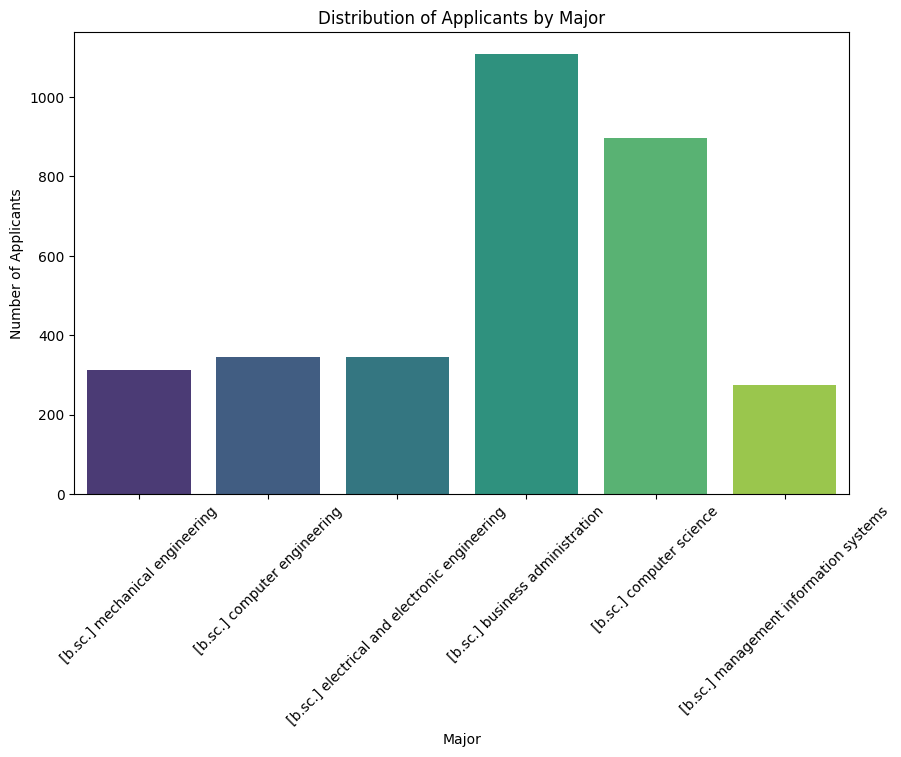

In [ ]:
# Distribution of Applicants by Major
# Countplot for the distribution of applicants by major
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Major', palette='viridis')
plt.title('Distribution of Applicants by Major')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

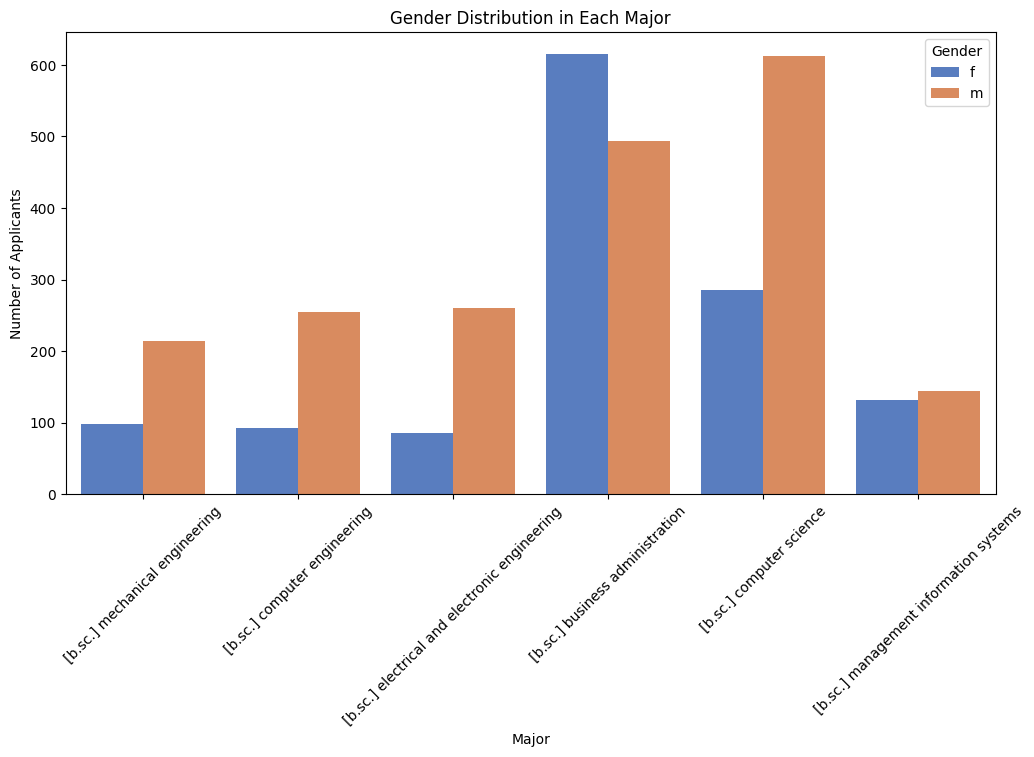

In [ ]:
# Gender Distribution for each major
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Major', hue='Gender', palette='muted')
plt.title('Gender Distribution in Each Major')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

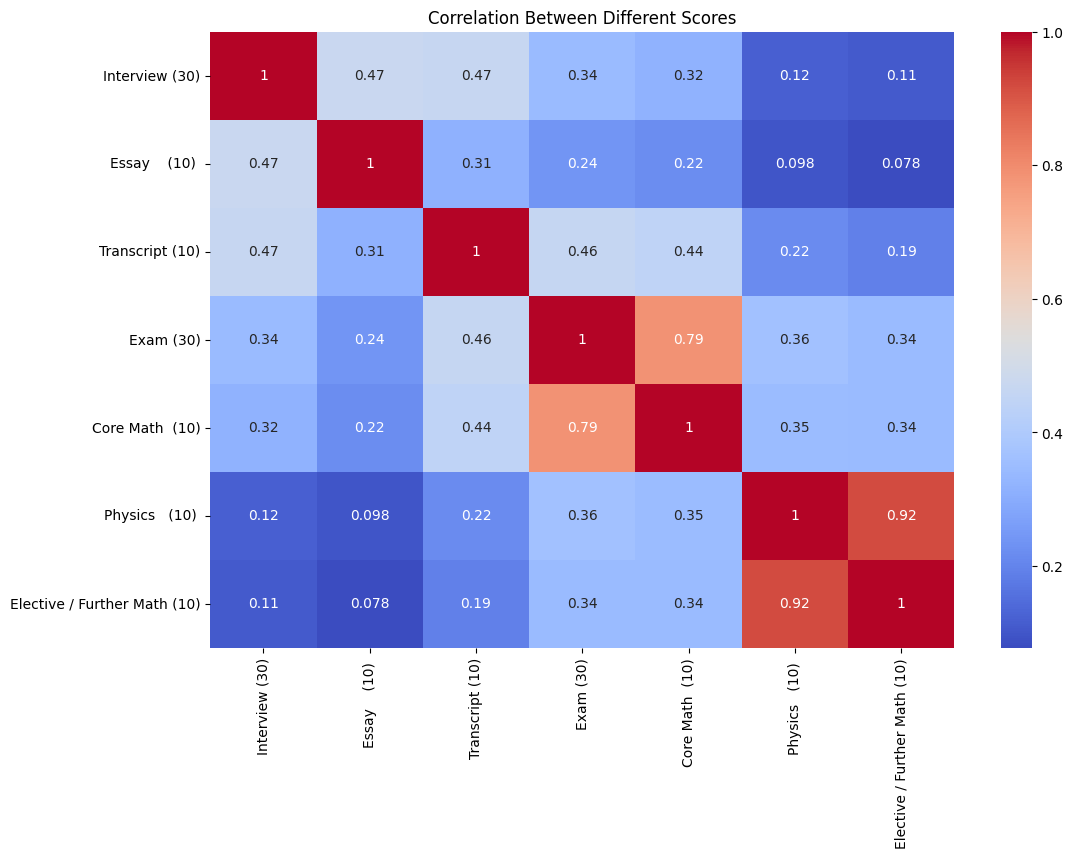

In [ ]:
plt.figure(figsize=(12, 8))
scores_columns = ['Interview (30)', 'Essay    (10) ', 'Transcript (10)', 'Exam (30)', 'Core Math  (10)', 'Physics   (10) ', 'Elective / Further Math (10)']
corr_matrix = data[scores_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Scores')
plt.show()